# Sentiment Analysis Data Pipeline
This is a scripted data pipeline to ingest our excel data on movie theater reviews and run a sentiment analysis on it using TextBlob.

In [85]:
# Install TextBlob Package
!pip install textblob

In [87]:
# Import the other necessary packages
import pandas as pd
import numpy as np
from textblob import TextBlob
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

## TextBlob Test Run
We will run a test of the TextBlob package to better understand how it works in the analysis process.

In [7]:
# TEST OF TEXTBLOB, DO NOT USE IN FINAL PRODUCT
df = pd.DataFrame({'text': ['I love this product!', 'This is terrible.', 'It was okay.']})

# Apply TextBlob's sentiment analysis to the 'text' column
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment)

# Extract polarity and subjectivity scores
df['polarity'] = df['sentiment'].apply(lambda x: x.polarity)
df['subjectivity'] = df['sentiment'].apply(lambda x: x.subjectivity)

print(df)

                   text     sentiment  polarity  subjectivity
0  I love this product!  (0.625, 0.6)     0.625           0.6
1     This is terrible.   (-1.0, 1.0)    -1.000           1.0
2          It was okay.    (0.5, 0.5)     0.500           0.5


## Importing our Dataset
We will import our scrapped movie reviews from our github repository and transform it into a Pandas Dataframe for further analysis.

In [10]:
# Set URLs to github repositories with data
movieTheaterData = "https://raw.githubusercontent.com/ChrisxCross2003/DS4002Project1/refs/heads/main/Data/Movie_Theater.csv"

movies_df = pd.read_csv(movieTheaterData)

In [90]:
# Display the first rows of the DataFrame
movies_df.head()

,Theater Name,Review date,Author name,Local Guide,Star rating,Review content,Sentiment Polarity,Subjectivity
0,Violet Crown,1/24/2025,M,True,5,"What an awesome, little theater! We were fortu...",0.308514,0.643595
1,Violet Crown,1/23/2025,Randy Carter (Pastor Randy),True,5,Great spot to see a movie while in downtown Ch...,0.8,0.75
2,Violet Crown,1/16/2025,Lindsey,True,5,NaN,<NA>,<NA>
3,Violet Crown,1/9/2025,Kyle Dratwa,True,5,NaN,<NA>,<NA>
4,Violet Crown,1/2/2025,Waleed Omar,False,5,NaN,<NA>,<NA>


## Analyzing the Dataset
We will use the functions of TextBlob to get the sentiment polarity and subjectivity of each review content for the three movie theaters.

In [16]:
# Define a function to get sentiment polarity using TextBlob
def get_sentiment(review):
    if pd.isnull(review) or review == 'NaN':
        return pd.NA, pd.NA
    else:
        blob = TextBlob(review)
        return blob.sentiment.polarity, blob.sentiment.subjectivity

# Apply the function to each row in the 'Review content' column
movies_df[['Sentiment Polarity', 'Subjectivity']] = movies_df['Review content'].apply(lambda review: pd.Series(get_sentiment(review)))

In [18]:
# Printing the output for debugging
print(movies_df[['Review content', 'Sentiment Polarity', 'Subjectivity', 'Theater Name']])

                                         Review content Sentiment Polarity  \
0     What an awesome, little theater! We were fortu...           0.308514   
1     Great spot to see a movie while in downtown Ch...                0.8   
2                                                   NaN               <NA>   
3                                                   NaN               <NA>   
4                                                   NaN               <NA>   
...                                                 ...                ...   
2936                                                NaN               <NA>   
2937                                                NaN               <NA>   
2938                                                NaN               <NA>   
2939                                                NaN               <NA>   
2940  For movies - this is convienent due to distanc...          -0.093353   

     Subjectivity  
0        0.643595  
1            0.75  
2  

In [20]:
# convert our sentiment analysis into a new dataframe to prep for export.
sentiment_df = movies_df[['Review content', 'Sentiment Polarity', 'Subjectivity', 'Author name', 'Theater Name']]

In [93]:
# Display the first rows of the sentiment analysis for each review content
sentiment_df.head()

,Review content,Sentiment Polarity,Subjectivity
0,"What an awesome, little theater! We were fortu...",0.308514,0.643595
1,Great spot to see a movie while in downtown Ch...,0.8,0.75
2,NaN,<NA>,<NA>
3,NaN,<NA>,<NA>
4,NaN,<NA>,<NA>


In [34]:
# Export DataFrame to CSV
sentiment_df.to_csv("sentiment_analysis_results.csv", index=False)

## Generating Visualizations
We will create bar charts for total number of reviews per movie theater brand and average rating per movie theater brand. 

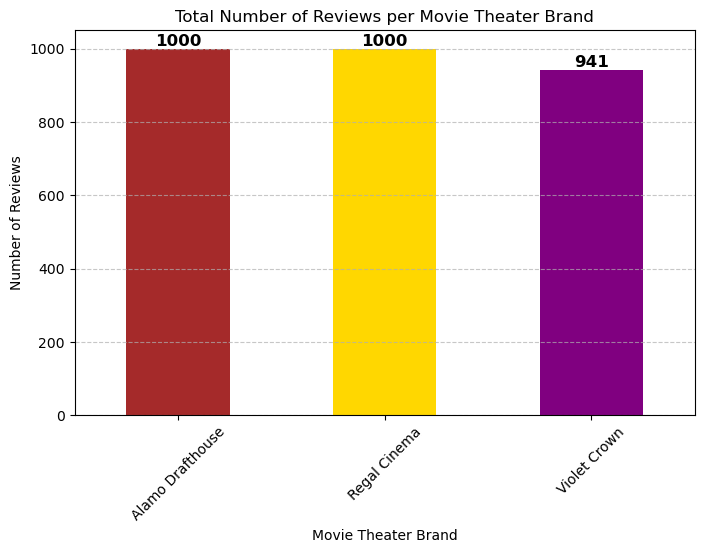

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Count the number of reviews per brand
review_counts = movies_df["Theater Name"].value_counts()

# Plot the bar chart
plt.figure(figsize=(8, 5))
bars = review_counts.plot(kind="bar", color=["brown", "gold", "purple"])

# Add labels on top of each bar
for bar in bars.containers[0]:  # Use 'bar.containers[0]' to access the bars
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), str(int(bar.get_height())),
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Labels and title
plt.xlabel("Movie Theater Brand")
plt.ylabel("Number of Reviews")
plt.title("Total Number of Reviews per Movie Theater Brand")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.show()

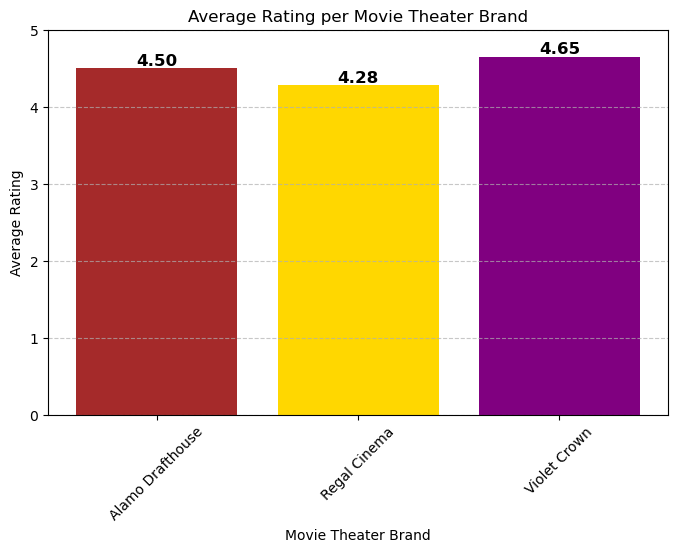

In [64]:
# Compute the average rating per brand
avg_ratings = movies_df.groupby("Theater Name")["Star rating"].mean()

# Create the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(avg_ratings.index, avg_ratings.values, color=["brown", "gold", "purple"])

# Add labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f"{bar.get_height():.2f}",
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Labels and title
plt.xlabel("Movie Theater Brand")
plt.ylabel("Average Rating")
plt.title("Average Rating per Movie Theater Brand")
plt.xticks(rotation=45)
plt.ylim(0, 5)  # Ratings typically range from 0 to 5
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()